In [1]:
%pylab inline
from IPython.display import display, Math, Latex
from scipy import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
arc = load('mnist.npz')

x_train = arc['arr_0']
y_train = arc['arr_1']
x_test  = arc['arr_2']
y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
##function given by prof.

def classify(z):
    all_distances = array([dist(x, z) for x in x_train])
    digit = y_train[argmin(all_distances)]
    return digit

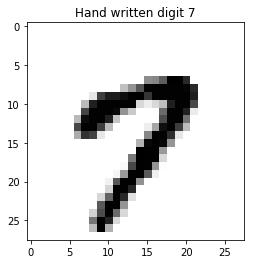

In [4]:
# Show image number 15, and write in the title what digit it should correspond to
N=15
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

##                                    GENERAL GUIDELINES


1. Time all functions you construct, and try to make them run as fast as possible by precomputing anything that can be precomputed
2. Extra points are gained if you reduce the complexity of the given algorithms in any possible way, for example by exploiting linearity, etc.
3. If something takes too long to execute, make sure you time it on a smaller set of input data, and give estimates of how long it would take to run the full thing (without actually running it). Plot only the results you manage to run on your PC.




##                                                           ASSIGNMENT 1 

Implement the following distance functions.
1. Dinfty
2. D_one 
3. D_two


In [5]:

def d_infty(a,b):
    return norm((b-a).reshape(-1),inf)

def d_one(a,b):
    return norm((b-a).reshape(-1),1)

def d_two(a,b):
    return norm((b-a).reshape(-1),2)




#### COMMENT OF ASSIGNMENT 1

funtion that I used:
1. norm(x, ord): This function is able to return one of eight different matrix norms, or one of an infinite number of vector norms , depending on the value of the ord parameter (in our case ord= inf,1,2)
2. reshape(): Gives a new shape to an array without changing its data.

## Assignment 2

Write a function that, given a number N, and a distance function dist, computes the distance matrix D of shape (N,N) between the first N entries of x_train:
\begin{equation}
 D[i,j] = dist(x_train[i], x_train[j])
\end{equation}

erforming the minimum number of operations (i.e., avoid computing a distance if it has already been computed before, i.e., keep in mind that dist(a,b) = dist(b,a)).


In [6]:
def distance(N,dist):
    D = zeros((N,N))
    
    for i in range(N):
        for j in range(i+1,N):
            D[i][j] = D[j][i] = dist(x_train[i],x_train[j])
            
    return D        

A= distance(4,d_infty)
print(A)


[[0.         1.         1.         0.99215686]
 [1.         0.         1.         1.        ]
 [1.         1.         0.         1.        ]
 [0.99215686 1.         1.         0.        ]]


## Asiignment 3

Compute and plot the three distance matrices
1. Dinfty
2. D1
3. D2

for the first 100 images of the training set, using the function imshow applied to the three matrices

In [7]:
# define the 3 matrices

Dinfty = distance(100,d_infty)
D1 = distance(100,d_one)
D2 = distance(100,d_two)


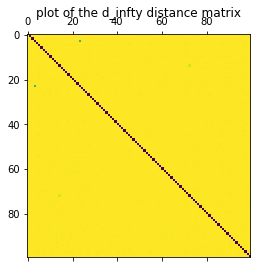

In [8]:
matshow(Dinfty)
_ = title('plot of the d_infty distance matrix')

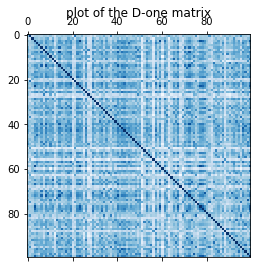

In [9]:
matshow(D1,cmap='Blues_r')
_ = title('plot of the D-one matrix')

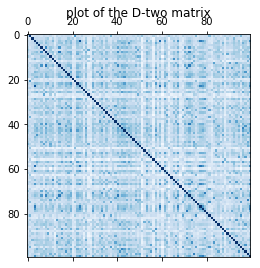

In [10]:
matshow(D2,cmap='Blues_r')
_ = title('plot of the D-two matrix')

## ASSIGNMENT 4

Using only a distance matrix, apply the algorithm described above and compute the efficency of the algorithm, i.e., write a function that:

Given a distance matrix with shape (N,N), constructed on the first N samples of the x_train set, count the number of failures of the leave one out strategy, i.e.,

1. set error_counter to zero

2. for every line i of the matrix:
    
    1. find the index j (different from i) for which D[i,k] >= D[i,j] for all k different from i and j.
    
    2. if y_train[j] is different from y_train[i], increment by one error_counter.

3. return the error: error_counter/N.

4. apply the function above to the 3 different distance matrices you computed before

In [11]:
# Funzione che riceve in input una matrice distanza e ritorna un numero che rappresenta l'errore
#Nell'ass.4 chiede di prendere una riga della matrice delle distanze, trovare l'indice per cui c'é 
#il valore minimo della disranza e vedere se é le y_train sono diverse 
#(ovvero se i numeri corrispondenti sono diversi)

#tanto le matrici sono uguali nelle dimensioni comuni
def performance(N,dist_matrix):
    D = dist_matrix[0:N,0:N] # considero solo le righe e le colonne che mi interessano 
    error_counter = 0
    for i in range(N):
        if i!=N-1:
            D[i,i] = D[i,i+1] + 100  # faccio in modo che non prenda elemento diagonale
        else:
            D[i,i] = D[i,i-1] + 100
        minimo = argmin(D[i,:]) #trova l'indice dove c'è l'elemento minimo
        if (y_train[i]!=y_train[minimo]):
            error_counter = error_counter + 1
    return error_counter/N





##questo algoritmo è molto dispendioso, perché ogni volta crea una matrice delle distanze
##l'algoritmo di prima invece lo riceve in input e prende la sottomatrice che gli serve
def performance2(N,dist):
    D = distance(N,dist)
    error_counter = 0
    for i in range(N):
        if i!=N-1:
            D[i,i] = D[i,i+1] + 100  # faccio in modo che non prenda elemento diagonale
        else:
            D[i,i] = D[i,i-1] + 100
        minimo = argmin(D[i,:]) #trova l'indice dove c'è l'elemento minimo
        if (y_train[i]!=y_train[minimo]):
            error_counter = error_counter + 1
    return error_counter/N




#qualcosa non va..introduco un errore? secondo me ci starebbe

## ASSIGNMENT 5 

Run the algorithm implemented above for N=100,200,400,800,1600 on the three different distances, and plot the three error rate as a function of N (i.e., compute the distance matrix, and compute the efficiency associated to the distance matrix).




In [13]:
from timeit import default_timer as timer
Size = [100,200,400,800,1600]
errors = [] #array con gli 
start = timer()
D_I = distance(1600,d_infty)
D_1 = distance(1600,d_one)
D_2 = distance(1600,d_two)

errors = zeros((5,3))

for i in range(5):
    errors[i][0] = performance(Size[i],D_I)
    errors[i][1] = performance(Size[i],D_1)
    errors[i][2] = performance(Size[i],D_2)
print(errors)
end = timer()
t = end -start
print("tempo trascorso per l'intero procedimento: ",t)





[[0.58     0.17     0.17    ]
 [0.52     0.145    0.135   ]
 [0.4425   0.15     0.135   ]
 [0.4      0.145    0.12875 ]
 [0.369375 0.1025   0.09375 ]]
tempo trascorso per l'intero procedimento:  46.051985522999985


In [59]:
##verifico che l'algoritmo performance2 è molto più lento del primo

err = zeros((5,3))
inizio = timer()
for i in range(5):
    err[i][0] = performance2(Size[i],d_infty)
    err[i][1] = performance2(Size[i],d_one)
    err[i][2] = performance2(Size[i],d_two)
    
print(err)
fine = timer()
tt = fine - inizio
print("tempo trascorso per l'intero procedimento: ",tt)



[[0.58     0.17     0.17    ]
 [0.52     0.145    0.135   ]
 [0.4425   0.15     0.135   ]
 [0.4      0.145    0.12875 ]
 [0.369375 0.1025   0.09375 ]]
tempo trascorso per l'intero procedimento:  55.284306869999455


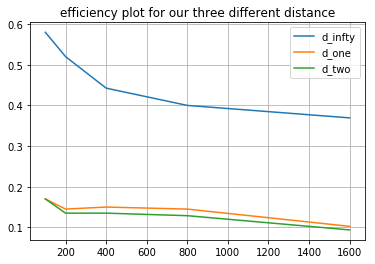

In [14]:
for i in range(3):  # tre volte--> una per ogni tipo di distanza 
    plot(Size,errors.T[i],)
title("efficiency plot for our three different distance")
legend(["d_infty","d_one","d_two"])
grid()

## ASSIGNMENT 6

In principle, it should be possible to decrease the error by using a better norm. From the table above, it is clear that the L2 distance works better than the L1 distance, which works better than the Linfty distance.

However, none of these distances exploit the fact that the image is a two-dimensional object, and that there is information also in the neighboring information of the pixels.

One way to exploit this, is to interpret the image as a continuous function with values between zero and one, defined on a square domain \Omega=[0,27]x[0,27].
\begin{equation*}
f:\Omega \longrightarrow \mathbb{R}
\end{equation*}




 
 

1. Implement a function that computes an approximation of the  H1 norm distance on the renormalized images. Given two images  f1 e f2.
    
    1. Compute
    \begin{equation*}
    a = \frac{f_{1}}{\int_{\Omega} f_{1} }
    \end{equation*}
    
    \begin{equation*}
    b = \frac{f_{2}}{\int_{\Omega} f_{2} }
    \end{equation*}
    2. Define the  H1 distance as  
    
    \begin{equation*}
     d_{H1}(f_{1},f_{2}) = \sqrt{\int_{\Omega}| \nabla(a-b)|^{2} + (a-b)^{2}}
    \end{equation*}
    
    3. Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600
 


In [13]:
#function which returns a and b---> normalized function!
from scipy import integrate
def normalization(f1,f2):
    a = f1/sum(f1)    #fa la somma dei valori pixel per pixel---matrice 28X28
    b = f2/sum(f2)
    return a,b

def h1_distance(f1,f2):
    a,b = normalization(f1,f2)
    z = a-b
    func = absolute(gradient(z))**2 + z**2
    res = sqrt(sum(func))
    return res

Size = [100,200,400,800,1600]
#creo una dict di matrici che definiscono la distanza!
print("inizio calcolo del dict")
start = timer()
matrici = {}
for i in Size:
    print("inizio")
    matrici[i] = distance(i,h1_distance)


end = timer()
print("fine calcolo del dict")
print(end-start)

#creo array di efficiency
print("inizio con efficienza")
inizio = timer()
H = distance(1600,h1_distance)
efficienza = []
for i in Size:
    efficienza.append(performance(i,H))
fine = timer()
print("fine con efficienza")
print(efficienza)
print("tempo necessario")
print(fine - inizio)

#compute distance matrix for N = 10 


inizio calcolo del dict


NameError: name 'timer' is not defined

## Assignment 7

An even better improvement on the previous distance function is given by the following algorithm

- Given two images $f1$ and $f2$:
    - Compute $$a = \frac{f_1}{\int_\Omega f_1}$$, $$b=\frac{f_2}{\int_\Omega f_2}$$
    - Solve 
    $$
    -\Delta \phi = a - b \qquad \text{ in } \Omega
    $$
    $$
    \phi = 0 \text{ on } \partial\Omega
    $$
    - Define the *Monge Ampere* distance
    $$
    d_{MA}(f_1,f_2) = \int_\Omega (a+b)|\nabla \phi|^2
    $$

- Compute the distance matrix and the efficiency for this distance for N=100,200,400,800,1600



In [15]:

from scipy.sparse import *
from scipy.sparse.linalg import *
from scipy.sparse import csc_matrix


In [16]:
import scipy 
import scipy.linalg  








In [22]:
from timeit import default_timer as timer
def laplace(N):
    A = diags([-1,-1,4,-1,-1], [-N,-1, 0, 1,N], shape=(N*N,N*N)).toarray()
    for i in range(1,N):
        A[i*N,(i*N)-1] = 0
        A[(i*N)-1,i*N] = 0
    return A



# voglio risolvere delta(phi) = b-a

def LU(N):
    L = laplace(N)
    LAP = csc_matrix(L) # compact representation of sparse matrices
    return splu(LAP)
 
l = len(x_train[0]) - 2 
A = LU(l)  

def resolve(immagine):
    immagine = immagine[1:-1,1:-1]
    lun = len(immagine)
    u = immagine.reshape(-1)
    #A = laplace(lun)
    #print("inizio fattorizzazione LU")
    #A = LU(lun)
    #v = solve(A,u)
    #cont = 1
    
    #cont = cont + 1
    v = A.solve(u)
    v = v.reshape(lun,lun)
    sol = zeros((28,28))
    sol[1:-1,1:-1]=v
    
    return sol
   


In [23]:
## distanza di Monge ampere
from timeit import default_timer as timer

Size = [100,200,400,800,1600]

def grad_norm(f):
    grad = gradient(f)
    return  grad[0]**2 + grad[1]**2

def D_MA(f1,f2):
    a = f1/sum(f1)
    b = f2/sum(f2)
    phi = resolve(a-b)
    func = (a+b)*grad_norm(phi)
    return sum(func)
print("inizio operazione")
start = timer()
ampere = distance(1600,D_MA)
end = timer()

print(end - start)
eff = []
for i in Size:
    eff.append(performance(i,ampere))
end = timer()
print("fine operazione")
print(end - start)



inizio operazione
262.7507853970001
fine operazione
262.7649920550002


[0.24, 0.2, 0.145, 0.12875, 0.12125]


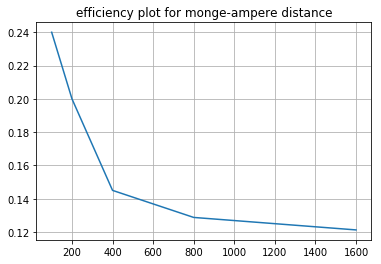

In [24]:
print(eff)
plot(Size,eff)
title("efficiency plot for monge-ampere distance")
grid()
